In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bikes.csv')
df.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2843275e400>,
 'caps': [<matplotlib.lines.Line2D at 0x2843275ea90>,
 'boxes': [<matplotlib.lines.Line2D at 0x28432642f60>],
 'medians': [<matplotlib.lines.Line2D at 0x2843275eeb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2843276d4a8>],
 'means': []}

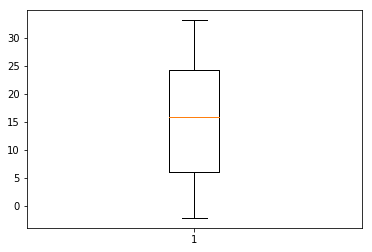

In [4]:
plt.boxplot(df['temperature'])

{'whiskers': [<matplotlib.lines.Line2D at 0x284327c90b8>,
 'caps': [<matplotlib.lines.Line2D at 0x284327e8cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x284327e82b0>],
 'medians': [<matplotlib.lines.Line2D at 0x284327f23c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x284327f2710>],
 'means': []}

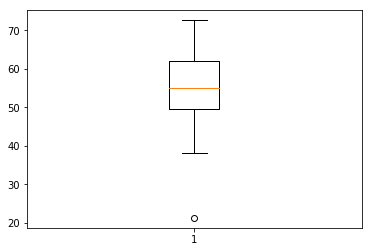

In [5]:
plt.boxplot(df['humidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2843283de10>,
 'caps': [<matplotlib.lines.Line2D at 0x28432849748>,
 'boxes': [<matplotlib.lines.Line2D at 0x2843283dcc0>],
 'medians': [<matplotlib.lines.Line2D at 0x28432849dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x28432849eb8>],
 'means': []}

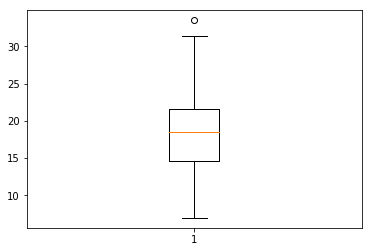

In [6]:
plt.boxplot(df['windspeed'])

In [ ]:
# after reviewing found out that there are no outliers..

In [8]:
dfcorr = df.corr()

In [9]:
dfcorr

,temperature,humidity,windspeed,count
temperature,1.000000,0.152391,-0.058493,0.897247
humidity,0.152391,1.000000,-0.119008,0.044918
windspeed,-0.058493,-0.119008,1.000000,-0.130064
count,0.897247,0.044918,-0.130064,1.000000


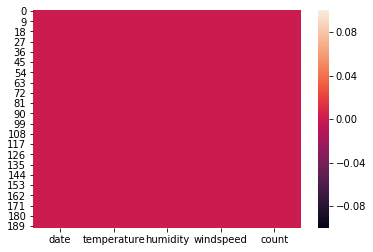

In [10]:
sns.heatmap(df.isnull())

In [ ]:
#hence there are no NAN Values..

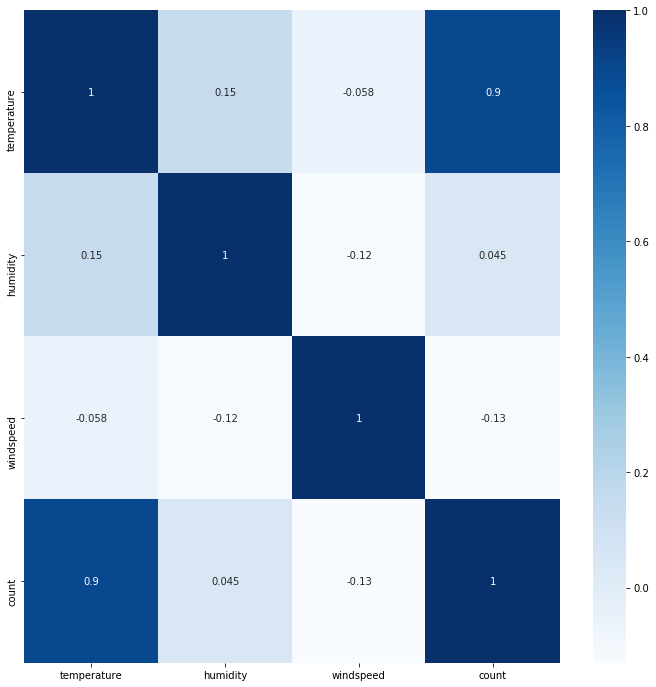

In [11]:
plt.figure(figsize = (12,12))
sns.heatmap(dfcorr, cmap= "Blues", annot = True)

In [ ]:
# here we can see count (output/targer) is proportinally dependent on termperature..

In [19]:
df = pd.DataFrame(data= df)
df.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


In [36]:
x= df.iloc[:,1:-1].values
x

array([[ 2.71606966, 45.71534591, 21.41495651],
       [ 2.8966733 , 54.26721902, 15.13688189],
       [ 4.23565354, 45.6977019 , 17.03457765],
       [ 3.11264266, 50.23734941, 10.09156767],
       [ 2.72391768, 49.14492833, 15.73820407],
       [ 1.96744541, 48.85125234, 17.03502942],
       [ 1.21097315, 48.55757635, 18.33185477],
       [ 0.45450089, 48.26390036, 19.62868011],
       [ 1.36139339, 59.62346036, 12.41459723],
       [ 1.54199703, 54.77588021, 25.43218813],
       [ 1.15818947, 47.56595692, 25.1734698 ],
       [ 0.95304838, 51.32977049, 12.7295959 ],
       [ 1.64592111, 55.85022455, 13.09030004],
       [ 2.33879384, 60.37067861, 13.45100418],
       [ 3.03166657, 64.89113267, 13.81170833],
       [ 3.7245393 , 69.41158674, 14.17241247],
       [ 7.47504496, 62.71534982, 18.56227838],
       [ 5.95973279, 51.35807907, 17.67684395],
       [ 1.77907655, 46.82144668, 28.89995536],
       [ 0.4527177 , 47.4664581 , 24.26551848],
       [-0.87364115, 48.11146951, 19.631

In [37]:
y = df.iloc[:,-1].values
y

array([ 120.        ,  108.        ,   82.        ,   88.        ,
        148.        ,  112.33333333,   76.66666667,   41.        ,
         43.        ,   25.        ,   38.        ,   54.        ,
         42.75      ,   31.5       ,   20.25      ,    9.        ,
         78.        ,   83.        ,   75.        ,   78.66666667,
         82.33333333,   86.        ,  186.        ,   34.        ,
         15.        ,   38.        ,   39.33333333,   40.66666667,
         42.        ,   47.        ,   72.        ,   61.        ,
         88.        ,   98.66666667,  109.33333333,  120.        ,
         64.        ,   53.        ,   47.        ,  149.        ,
        168.66666667,  188.33333333,  208.        ,  140.        ,
        218.        ,  259.        ,  579.        ,  452.75      ,
        326.5       ,  200.25      ,   74.        ,  139.        ,
        100.        ,  120.        ,  107.        ,   94.        ,
         81.        ,  137.        ,  231.        ,  123.     

In [38]:
# now will do train test split to train model...

In [39]:
from sklearn.model_selection import train_test_split


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.33, random_state= 47)

In [49]:
lr= LinearRegression()


In [50]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
lr.score(x_train,y_train)

0.811793265736199

In [52]:
pred = lr.predict(x_test)
pred

array([ 5.32906770e+01,  9.85874737e+01,  9.58367505e+02,  5.88832525e+02,
        9.79534120e+01,  2.93296616e+02, -4.35403998e+00,  1.56095497e+02,
        5.72634399e+02,  8.72428069e+02,  8.75072699e+02,  5.93865282e+02,
        1.22730545e+02,  2.01551778e+02,  5.85106460e+02,  8.61156843e+02,
        6.44306474e+02,  6.81352602e+02,  7.68418412e-02,  9.19241281e+02,
        4.01530182e+02,  5.21033865e+02,  7.10364955e+02,  4.51894834e+02,
        1.04860744e+02,  4.44314089e+02,  1.66196271e+01,  9.95346569e+02,
        7.14712544e+02,  7.76879956e+02,  1.20632249e+02,  9.79650880e+01,
        1.79951605e+02,  9.45599170e+01,  6.85262646e+01,  2.30394414e+02,
        4.38773653e+02,  7.80704494e+02,  7.89828329e+02,  9.48443104e+01,
        5.66051450e+02,  9.54367880e+02,  8.72484590e+02,  6.08390227e+02,
        9.85756531e+02,  8.85936281e+02,  6.02674066e+02,  2.14689733e+02,
        9.66366756e+02,  7.92282729e+02,  5.66814311e+02,  2.72696996e+01,
        3.57102029e+02,  

In [53]:
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

17619.824077777197
0.8345060117271246


In [54]:
t = np.array([3.0, 25.0, 21.0])
t

array([ 3., 25., 21.])

In [55]:
td=t.reshape(1,-1)
td

array([[ 3., 25., 21.]])

In [56]:
predy= lr.predict(td)
predy

array([185.26583415])

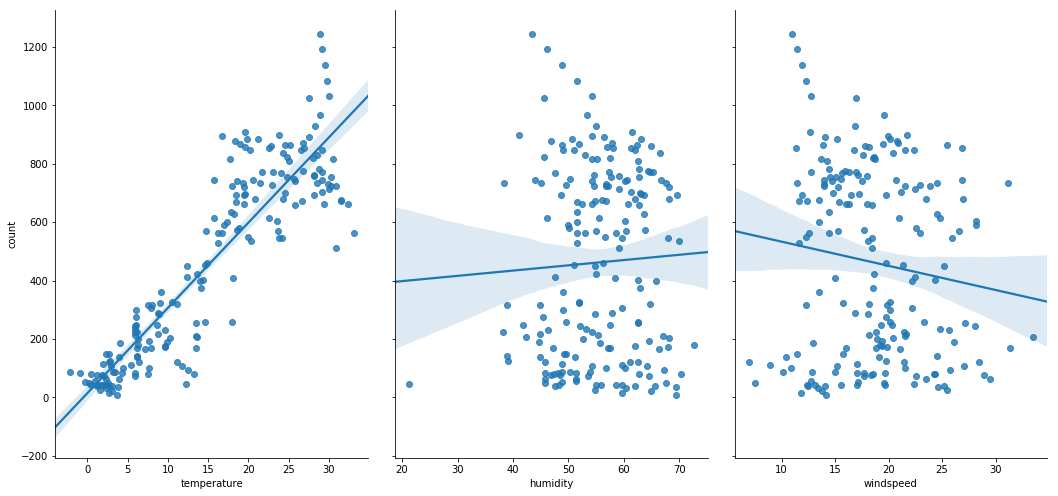

In [59]:
sns.pairplot(df, x_vars=['temperature','humidity', 'windspeed'], y_vars=['count'], aspect = 0.7, height = 7, kind= 'reg')

In [ ]:
# here we can see temeprature has more positive impact on count, where as humidity has weak relation and windspeed has negetive impact ....